# NESDIS DATA ANALYSIS 

The National Oceanic & Atmospheric Administration (NOAA) provides a composite analysis through its Satelite & Information service (NESDIS). The full set of experimantal data are available at http://rammb.cira.colostate.edu/products/tc_realtime/ and the operational data are available for download at ftp://satepsanone.nesdis.noaa.gov/MTCSWA/. Below we use the above links to extract and compare relevant data with our analysis. 

We poke the site with the huricane tag. Note that the id is the one used by JTWC 

In [1]:
import urllib2,urllib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
hurID='IO012016'  # here we need to include this info into our xml file for easy correlation 

In [3]:
response=urllib2.urlopen('ftp://satepsanone.nesdis.noaa.gov/MTCSWA/'+hurID)
ls=response.readlines()
lp=[elem.strip('\r\n').split() for elem in ls]
n=np.shape(lp)[0]


In [4]:
ifiles=[]
for i in range(n):
   print lp[i][-1]
   ifiles.append(lp[i][-1])

2016IO01_MPSATWD_2016051812.AAV
2016IO01_MPSATWD_2016051812.DIA
2016IO01_MPSATWD_2016051812.FIX
2016IO01_MPSATWD_2016051812.KE
2016IO01_MPSATWD_2016051812.LOG
2016IO01_MPSATWD_2016051812.MSL
2016IO01_MPSATWD_2016051812.PEN
2016IO01_MPSATWD_2016051812.SFC
2016IO01_MPSATWD_2016051812.STATUS
2016IO01_MPSATWD_2016051812.WIN
2016IO01_MPSATWD_2016051812.bin
2016IO01_MPSATWD_2016051812.ctl
2016IO01_MPSATWD_2016051812.inp
2016IO01_MPSATWD_2016051812.obs
2016IO01_MPSATWD_2016051812_AMSU.png
2016IO01_MPSATWD_2016051812_CDFT.png
2016IO01_MPSATWD_2016051812_IRWD.png
2016IO01_MPSATWD_2016051812_IR__.png
2016IO01_MPSATWD_2016051812_KE__.png
2016IO01_MPSATWD_2016051812_MSLP.png
2016IO01_MPSATWD_2016051812_SCAT.png
2016IO01_MPSATWD_2016051812_SWHR.png
2016IO01_MPSATWD_2016051812_SWND.png
2016IO01_MPSATWD_2016051818.AAV
2016IO01_MPSATWD_2016051818.DIA
2016IO01_MPSATWD_2016051818.FIX
2016IO01_MPSATWD_2016051818.KE
2016IO01_MPSATWD_2016051818.LOG
2016IO01_MPSATWD_2016051818.MSL
2016IO01_MPSATWD_201605181

From all this files some are quite interesting for analysis. The tracking and TC attribute data are in the .DIA files

In [5]:
for f in ifiles:
    if f[-4:]=='.DIA' : print f

2016IO01_MPSATWD_2016051812.DIA
2016IO01_MPSATWD_2016051818.DIA
2016IO01_MPSATWD_2016051900.DIA
2016IO01_MPSATWD_2016051906.DIA
2016IO01_MPSATWD_2016051912.DIA
2016IO01_MPSATWD_2016051918.DIA
2016IO01_MPSATWD_2016052000.DIA
2016IO01_MPSATWD_2016052006.DIA
2016IO01_MPSATWD_2016052012.DIA
2016IO01_MPSATWD_2016052018.DIA
2016IO01_MPSATWD_2016052100.DIA
2016IO01_MPSATWD_2016052106.DIA
2016IO01_MPSATWD_2016052112.DIA
2016IO01_MPSATWD_2016052118.DIA
2016IO01_MPSATWD_2016052200.DIA
2016IO01_MPSATWD_2016052206.DIA


Let's store these files

In [6]:
diafiles=[f for f in ifiles if f[-4:]=='.DIA']
diafiles.sort()

We can read the DIA files with 

In [85]:
import copy
def read_all(filename):
     with open(filename, 'r') as f:
         lines = [line.rstrip('\n') for line in f]
#        lines = [line for line in f]
     f.close()
     return lines

def read_dia(filename,path=None):
    dat=read_all(filename)
   # print dat
    var=[]
    value=[]
    line=dat[0].split()
    
    if np.size(line)%2 == 0:
       no=np.size(line)/2
    else:
       if line[2].count('-') == 2 :
        newline=copy.copy(line)
        newline.append([])        
        newline[:2]=line[:2]       
        newline[4:]=line[3:]
        newline[2:4]=line[2].split('-')[1:]
        newline[2:4]=map(float, newline[2:4])
        newline[2:4]=[-x for x in newline[2:4]]
        line=newline
       else:
          print 'check input'
       no=np.size(newline)/2
    
    for i in range(no):
          var.append(line[no+i])
          value.append(line[i])
    
    value[2:4]=map(float, value[2:4])
    value[7:9]=map(float, value[7:9])
    value[1]=int(value[1])
    value[4:7]=map(int, value[4:7])
    
    var[:-1]=[x[:-1] for x in var[:-1]]
    
    for i in range(3):
          line=dat[i+1].split()
          var.append(line[4])
          value.append(map(int,line[0:4]))
    
    line=dat[4].split()
    no=np.size(line)/2
    
    for i in range(no):
          var.append(line[no+i][:-1])
          value.append(int(line[i]))
    d=dict(zip(var,value))                                                                                                                                                                                           
    
    return d

So we can retrive the file and read it

In [86]:
urllib.urlretrieve('ftp://satepsanone.nesdis.noaa.gov/MTCSWA/'+hurID+'/'+ diafiles[0], filename='tmp/'+diafiles[0])

('tmp/2016IO01_MPSATWD_2016051812.DIA',
 <mimetools.Message instance at 0x7fbc92a35f80>)

In [87]:
info=read_dia('tmp/'+diafiles[0])

In [88]:
for k in info:
    print k,info[k]

BEARING 40
MSLP 997.0
R34 [0, 0, 0, 0]
HR 12
RMAX 154
LON 82.2
W-180 22
W@RMW+20 27
LAT 13.9
P600 1003.3
UBAR150 -8
R64 [0, 0, 0, 0]
DATE 20160518
R50 [0, 0, 0, 0]
VMAX(R<180nmi) 29
VBAR15 19


#### Note the dimensions. MSLP is in [hPa]  Winds are in [Kt] and Radius of Max wind is in [nmi]

We can now parse all DIA files and plot the RMAX and pressure in terms of timeWe can now parse all DIA files and plot the RMAX and pressure in terms of time

In [89]:
import datetime
import matplotlib.dates as mdates
import os

n=np.shape(diafiles)

dstamp=[]
val=[]
rmw=[]
mw=[]
penv=[]
for i in range(n[0]):
    filename='tmp/'+diafiles[i]
    if not os.path.isfile(filename) :urllib.urlretrieve('ftp://satepsanone.nesdis.noaa.gov/MTCSWA/'+hurID+'/'+ diafiles[i], filename='tmp/'+diafiles[i])
    info=read_dia('tmp/'+diafiles[i])
    t=info['DATE']+str(info['HR'])
    dstamp.append(datetime.datetime.strptime(t,'%Y%m%d%H'))
    val.append(info['MSLP'])
    rmw.append(info['RMAX'])
    mw.append(info['VMAX(R<180nmi)'])
    penv.append(info['P600'])

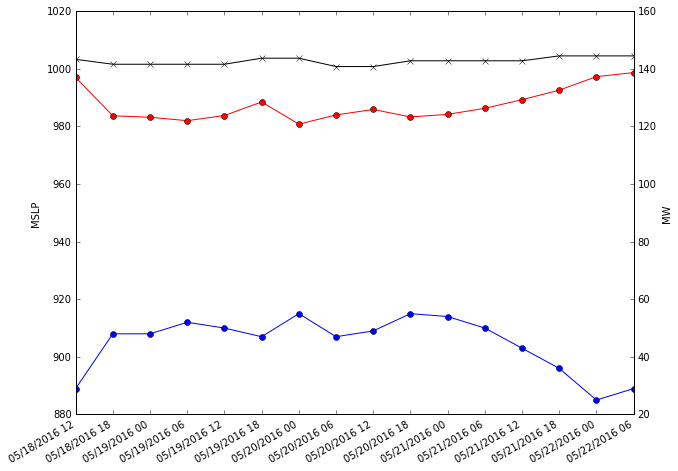

In [90]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=[0,6,12,18]))
ax1.xaxis_date()
    
ax1.plot(dstamp,val,'ro-')
ax1.plot(dstamp,penv,'kx-')
ax1.set_ybound(880,1020)
ax1.set_ylabel('MSLP')

ax2=ax1.twinx()
ax2.plot(dstamp,mw,'bo-')
ax2.set_ylabel('MW')
ax2.set_ybound(20,160)

plt.gcf().autofmt_xdate()

plt.show()

The analysis from NESDIS is done on a cylindrical grid (convinient!). The actual data are saved in '.SFC' files.

In [16]:
for f in ifiles:
    if f[-4:]=='.SFC' : print f

2016IO01_MPSATWD_2016051812.SFC
2016IO01_MPSATWD_2016051818.SFC
2016IO01_MPSATWD_2016051900.SFC
2016IO01_MPSATWD_2016051906.SFC
2016IO01_MPSATWD_2016051912.SFC
2016IO01_MPSATWD_2016051918.SFC
2016IO01_MPSATWD_2016052000.SFC
2016IO01_MPSATWD_2016052006.SFC
2016IO01_MPSATWD_2016052012.SFC
2016IO01_MPSATWD_2016052018.SFC
2016IO01_MPSATWD_2016052100.SFC
2016IO01_MPSATWD_2016052106.SFC
2016IO01_MPSATWD_2016052112.SFC
2016IO01_MPSATWD_2016052118.SFC
2016IO01_MPSATWD_2016052200.SFC
2016IO01_MPSATWD_2016052206.SFC


In [17]:
sfcfiles=[f for f in ifiles if f[-4:]=='.SFC']
sfcfiles.sort()

In [21]:
for i in range(n[0]):
    filename='tmp/'+sfcfiles[i]
    if not os.path.isfile(filename) :urllib.urlretrieve('ftp://satepsanone.nesdis.noaa.gov/MTCSWA/'+hurID+'/'+ sfcfiles[i], filename='tmp/'+sfcfiles[i])


tmp/2016IO01_MPSATWD_2016051812.SFC True
tmp/2016IO01_MPSATWD_2016051818.SFC True
tmp/2016IO01_MPSATWD_2016051900.SFC True
tmp/2016IO01_MPSATWD_2016051906.SFC True
tmp/2016IO01_MPSATWD_2016051912.SFC True
tmp/2016IO01_MPSATWD_2016051918.SFC True
tmp/2016IO01_MPSATWD_2016052000.SFC True
tmp/2016IO01_MPSATWD_2016052006.SFC True
tmp/2016IO01_MPSATWD_2016052012.SFC True
tmp/2016IO01_MPSATWD_2016052018.SFC True
tmp/2016IO01_MPSATWD_2016052100.SFC True
tmp/2016IO01_MPSATWD_2016052106.SFC True
tmp/2016IO01_MPSATWD_2016052112.SFC True
tmp/2016IO01_MPSATWD_2016052118.SFC True
tmp/2016IO01_MPSATWD_2016052200.SFC True
tmp/2016IO01_MPSATWD_2016052206.SFC True


## Define timestamp

In [101]:
k=10

In [128]:
info=read_dia('tmp/'+diafiles[k])
print 'timestap = {} {} h'.format(info['DATE'],info['HR'])

timestap = 20160521 0 h


In [103]:
dat=np.loadtxt('tmp/'+sfcfiles[k])

In [104]:
# for the data manipulation see NESDIS manual
lat=dat[:,1]
lon=dat[:,2]
u=dat[:,3]
v=dat[:,4]

th=np.linspace(0,2*np.pi,37)
ur=u.reshape(37,201)*.9 # from 1 to 10 m average
uth=v.reshape(37,201)*.9
rlon=lon.reshape(37,201)
rlat=lat.reshape(37,201)

In [105]:
vel0=np.sqrt(ur**2+uth**2) # total velocity

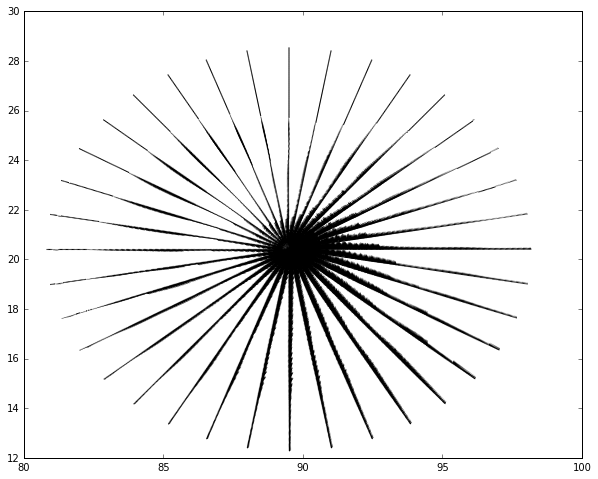

In [106]:
#visualize
fig = plt.figure(figsize=(10,8))
plt.quiver(rlon,rlat,ur,uth,scale=3000)
plt.show()

Ploting the velocity as function of radius

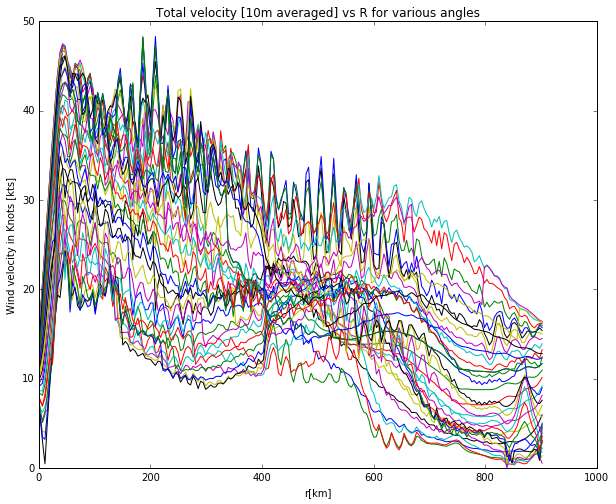

In [107]:
fig = plt.figure(figsize=(10,8))

rr=np.linspace(2.,902.,201) # see nesdis manual

plt.plot(rr,vel0.T)
plt.title('Total velocity [10m averaged] vs R for various angles')
plt.xlabel('r[km]')
plt.ylabel('Wind velocity in Knots [kts]')
plt.show()

We can isolate the maximum, mean and minimum components

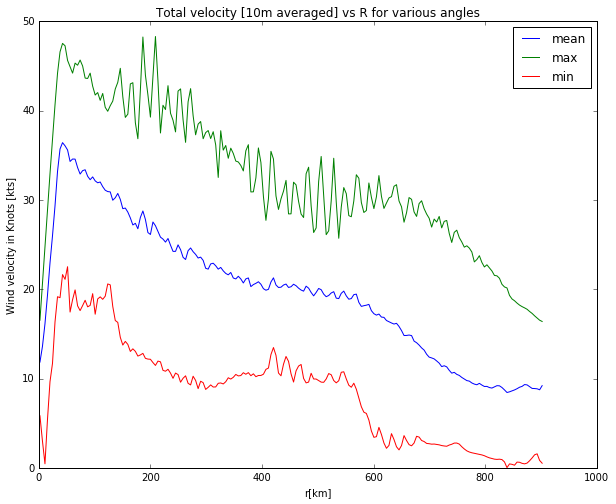

In [108]:
fig1 = plt.figure(figsize=(10,8))

rr=np.linspace(2.,902.,201) # see nesdis manual

plt.plot(rr,vel0.mean(axis=0),label='mean')
plt.plot(rr,vel0.max(axis=0),label='max')
plt.plot(rr,vel0.min(axis=0),label='min')
plt.title('Total velocity [10m averaged] vs R for various angles')
plt.xlabel('r[km]')
plt.ylabel('Wind velocity in Knots [kts]')
plt.legend()
plt.show()

In addition we can convert to m/s for comparison

In [109]:
nm2m=1852. # 1 nautical mile to meters
kt2ms=nm2m/3600.  # knots to m/s


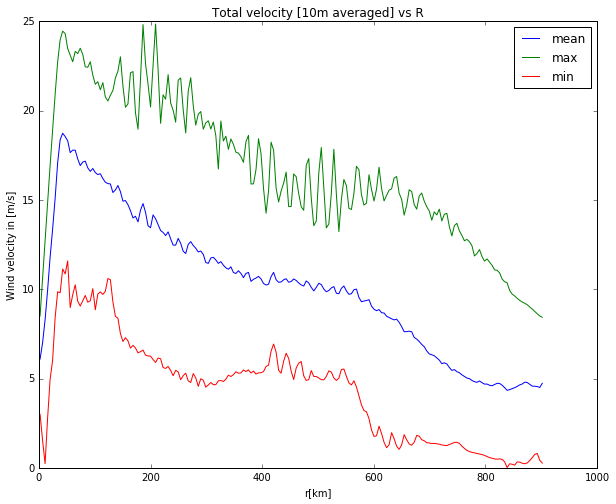

In [126]:
fig2 = plt.figure(figsize=(10,8))

rr=np.linspace(2.,902.,201) # see nesdis manual

plt.plot(rr,vel0.mean(axis=0)*kt2ms,label='mean')
plt.plot(rr,vel0.max(axis=0)*kt2ms,label='max')
plt.plot(rr,vel0.min(axis=0)*kt2ms,label='min')
plt.title('Total velocity [10m averaged] vs R')
plt.xlabel('r[km]')
plt.ylabel('Wind velocity in [m/s]')
plt.legend()
plt.show()

### Fitting to Holland

Note that the information in DIA files gives us parameters that we can fit to Holland

In [111]:
info

{'BEARING': 350,
 'DATE': '20160521',
 'HR': 0,
 'LAT': 20.4,
 'LON': 89.5,
 'MSLP': 984.2,
 'P600': 1002.8,
 'R34': [140, 205, 100, 20],
 'R50': [100, 100, 30, 0],
 'R64': [0, 0, 0, 0],
 'RMAX': 113,
 'UBAR150': -13,
 'VBAR15': 27,
 'VMAX(R<180nmi)': 54,
 'W-180': 32,
 'W@RMW+20': 45}

In [122]:
rhoa=1.15 #air density  Kg/m^3
dp=(info['P600']-info['MSLP'])*100. # convert to PA
print 'DP={} [PA]'.format(dp)
vm=info['VMAX(R<180nmi)']*kt2ms #convert to  m/s
vm=vm*.9 # convert to 10m average
print 'Vmax={} [m/s]'.format(vm)
b0=vm**2*rhoa*np.exp(1.)/dp #Eq (7) from JRC report
print 'B={}'.format(b0)
rmw=info['RMAX']*nm2m # convert to m
print 'Rmax={} [m]'.format(rmw)

DP=1860.0 [PA]
Vmax=14.9994368334 [m/s]
B=1.05057939738
Rmax=209276.0 [m]


In [123]:
#Define the Holland equation
maxR=500.e3  # maximum radius of TC [m] (500Km)

def Holland(r,b,rmax,deltap,k):
    x=0.5#+(r-rmax)/(maxR-rmax)*k 
    return (b/rhoa*(rmax/r)**b*deltap*np.exp(-(rmax/r)**b))**x # Eq (9) from report


In [124]:
vel2=np.zeros(201)
for l in range(201):
    r=rr[l]*1000 #transform to m
    vel2[l]=Holland(r,b0,rmw,dp,0.)

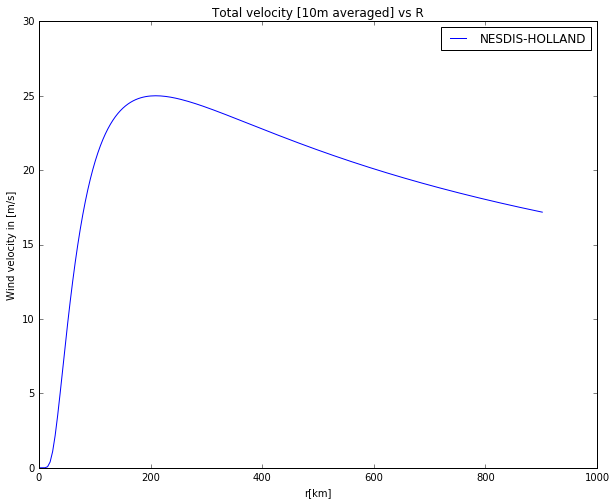

In [125]:
fig3 = plt.figure(figsize=(10,8))

plt.plot(rr,vel2,label='NESDIS-HOLLAND')
plt.title('Total velocity [10m averaged] vs R')
plt.xlabel('r[km]')
plt.ylabel('Wind velocity in [m/s]')
plt.legend()
plt.show()

Let's compare them

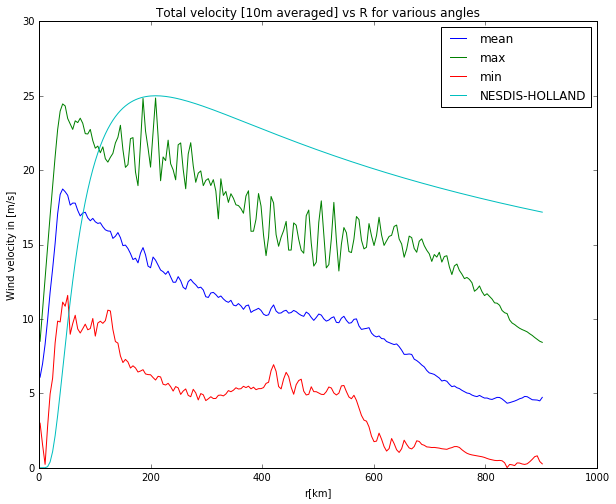

In [127]:
fig4 = plt.figure(figsize=(10,8))

rr=np.linspace(2.,902.,201) # see nesdis manual

plt.plot(rr,vel0.mean(axis=0)*kt2ms,label='mean')
plt.plot(rr,vel0.max(axis=0)*kt2ms,label='max')
plt.plot(rr,vel0.min(axis=0)*kt2ms,label='min')
plt.plot(rr,vel2,label='NESDIS-HOLLAND')
plt.title('Total velocity [10m averaged] vs R for various angles')
plt.xlabel('r[km]')
plt.ylabel('Wind velocity in [m/s]')
plt.legend()
plt.show()